In [1]:
# Import required Packages 
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data - Reading Boston Data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names) #Independent columns
y = pd.Series(boston.target) #Dependent column - Median value of House

In [3]:
# Descriptive Analysis

In [4]:
# This gives the information about the dataset
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# Generate descriptive statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# Finding the correlation between the independent features
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [7]:
# Finding Missing Values
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
# Visualize the data
#sns.pairplot(X)

In [9]:
# Split the dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
scaled_X_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [12]:
scaled_X_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [13]:
# model Traing
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train,y_train)

LinearRegression()

In [14]:
# finding y_pred
y_pred = lin_reg.predict(scaled_X_test)

In [15]:
#finding residuals
residuals = y_test-y_pred

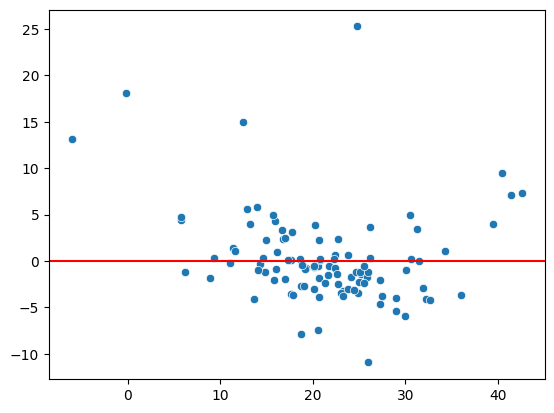

In [16]:
# plot the residuals to find the pattern of residuals
sns.scatterplot(y_pred,residuals)
plt.axhline(y=0,c='r')

<AxesSubplot:ylabel='Count'>

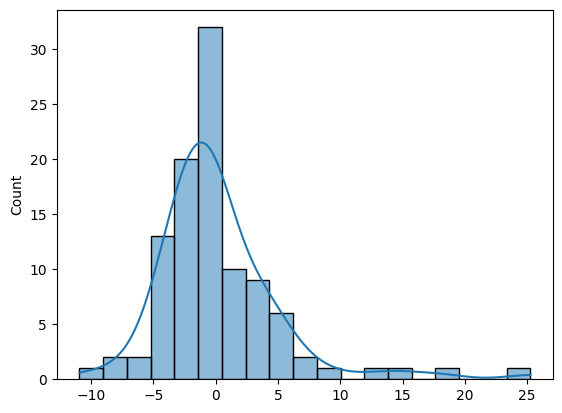

In [17]:
# residuals should follow normal distibution
sns.histplot(residuals,kde=True)

<AxesSubplot:>

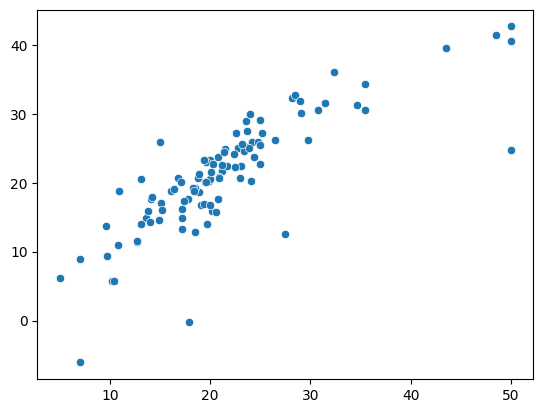

In [18]:
# plot the predicting values
sns.scatterplot(y_test,y_pred)

In [19]:
# Evaluating the model performace using metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred))

MAE : 3.1890919658878483
MSE : 24.29111947497352
RMSE : 4.928602182665337
R2 Score : 0.668759493535632


In [20]:
# Model Selection

In [21]:
def model_per(model):
    model.fit(scaled_X_train,y_train)
    y_p = model.predict(scaled_X_test)
    print("MAE :",mean_absolute_error(y_test,y_p))
    print("MSE :",mean_squared_error(y_test,y_p))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,y_p)))
    print("R2 Score :",r2_score(y_test,y_p))

In [22]:
# Import Various Regression Model Algorithms
from sklearn.linear_model import Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [23]:
model =Ridge()
model_per(model)

MAE : 3.1857238072446
MSE : 24.312903830491596
RMSE : 4.930811680696353
R2 Score : 0.6684624359643561


In [24]:
model = Lasso()
model_per(model)

MAE : 3.473770443541664
MSE : 27.577691776134742
RMSE : 5.251446636512147
R2 Score : 0.6239428734251422


In [25]:
model = SGDRegressor()
model_per(model)

MAE : 3.22408196283909
MSE : 24.916217986222154
RMSE : 4.991614767409656
R2 Score : 0.660235475214062


In [26]:
model = DecisionTreeRegressor()
model_per(model)

MAE : 2.801960784313726
MSE : 23.269019607843134
RMSE : 4.823797218773104
R2 Score : 0.6826971335029559


In [27]:
model = AdaBoostRegressor()
model_per(model)

MAE : 2.466656729649883
MSE : 12.993366634843815
RMSE : 3.604631275851084
R2 Score : 0.8228188145368471


In [28]:
model = GradientBoostingRegressor()
model_per(model)

MAE : 1.9078945433794308
MSE : 6.167888978112205
RMSE : 2.483523500616051
R2 Score : 0.9158929389388256


In [29]:
model = RandomForestRegressor()
model_per(model)

MAE : 2.1342156862745094
MSE : 8.763115745098034
RMSE : 2.960256026950715
R2 Score : 0.8805037001031294


In [30]:
model = SVR()
model_per(model)

MAE : 2.731716176155842
MSE : 25.66853967839608
RMSE : 5.066412900504269
R2 Score : 0.649976605976003


In [31]:
model = BaggingRegressor()
model_per(model)

MAE : 2.1730392156862743
MSE : 12.090567647058823
RMSE : 3.4771493564497375
R2 Score : 0.8351296343102017


In [32]:
model = ExtraTreesRegressor()
model_per(model)

MAE : 1.9266274509803907
MSE : 10.19732047058823
RMSE : 3.1933243603787305
R2 Score : 0.8609464829014104


In [33]:
# Final Model
gbr = GradientBoostingRegressor()
gbr.fit(scaled_X_train,y_train)
gbr_y_pred = gbr.predict(scaled_X_test)

In [34]:
# Evaluating the Final model performace using metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE :",mean_absolute_error(y_test,gbr_y_pred))
print("MSE :",mean_squared_error(y_test,gbr_y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,gbr_y_pred)))
print("R2 Score :",r2_score(y_test,gbr_y_pred))

MAE : 1.9036286668814681
MSE : 6.118379560310591
RMSE : 2.4735358417275037
R2 Score : 0.9165680632221778


In [35]:
#finding residuals
residuals = y_test-gbr_y_pred

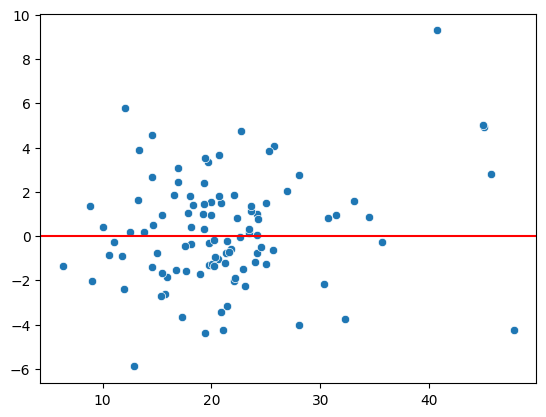

In [36]:
# plot the residuals to find the pattern of residuals
sns.scatterplot(gbr_y_pred,residuals)
plt.axhline(y=0,c='r')

<AxesSubplot:ylabel='Count'>

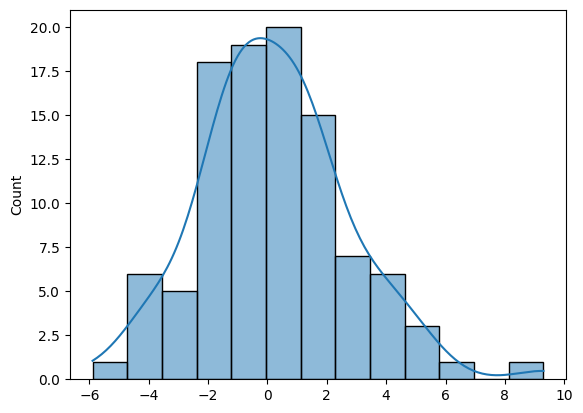

In [37]:
# residuals should follow normal distibution
sns.histplot(residuals,kde=True)

In [38]:
# Prediction 
new_data = boston.data[1]

In [39]:
nd =np.asarray(new_data).reshape(1,-1)

In [40]:
scaler.transform(nd)

array([[-0.40408251, -0.50032012, -0.56854551, -0.27808871, -0.74417419,
         0.14833882,  0.36993815,  0.54444797, -0.85748501, -0.97629231,
        -0.23285291,  0.44418004, -0.46712894]])

In [41]:
gbr_y_pred = gbr.predict(scaler.transform(nd))

In [42]:
gbr_y_pred

array([21.25027111])

In [43]:
y[1]

21.6

In [44]:
# Pickle the model for deployment

In [45]:
import pickle
pickle.dump(gbr,open('model.pkl','wb'))

In [46]:
pick_model = pickle.load(open('model.pkl','rb'))

In [47]:
pick_model.predict(scaler.transform(nd))

array([21.25027111])

In [55]:
# All Regression model in one flow
models = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),SGDRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),BaggingRegressor(),ExtraTreesRegressor(),SVR()]

In [54]:
for model in models:
    model.fit(scaled_X_train,y_train)
    y_p = model.predict(scaled_X_test)
    print(model)
    print("MAE :",mean_absolute_error(y_test,y_p))
    print("MSE :",mean_squared_error(y_test,y_p))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,y_p)))
    print("R2 Score :",r2_score(y_test,y_p))
    print('\n')

LinearRegression()
MAE : 3.1890919658878483
MSE : 24.29111947497352
RMSE : 4.928602182665337
R2 Score : 0.668759493535632


DecisionTreeRegressor()
MAE : 2.7823529411764714
MSE : 22.867254901960784
RMSE : 4.78197186335938
R2 Score : 0.6881757095230149


Ridge()
MAE : 3.1857238072446
MSE : 24.312903830491596
RMSE : 4.930811680696353
R2 Score : 0.6684624359643561


Lasso()
MAE : 3.473770443541664
MSE : 27.577691776134742
RMSE : 5.251446636512147
R2 Score : 0.6239428734251422


SGDRegressor()
MAE : 3.2120177661399185
MSE : 24.854506790559302
RMSE : 4.985429448960169
R2 Score : 0.6610769863567223


AdaBoostRegressor()
MAE : 2.6719682151166806
MSE : 14.107083282674816
RMSE : 3.755939733631893
R2 Score : 0.8076318624959824


GradientBoostingRegressor()
MAE : 1.9186768075662763
MSE : 6.2387503674983895
RMSE : 2.4977490601536396
R2 Score : 0.9149266531925787


RandomForestRegressor()
MAE : 2.1310882352941176
MSE : 9.181701088235293
RMSE : 3.0301321898945752
R2 Score : 0.8747957531638293


Bagg